Introduction to Regression with Tensor flow

def: Predicting a numerical vraible based on some other combination of variables, even shorter ... predicting anumber.

In [ ]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)

2.12.0


#  createing data to view and fit

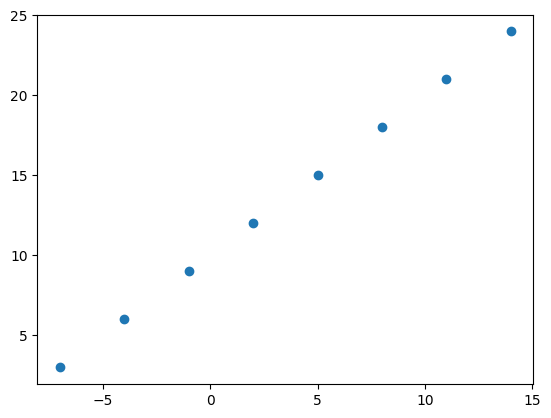

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# CReate labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#  input and output shapes


In [ ]:
#  create a demo tensor for our housimg prediction model
house_info = tf.constant(["bedroom",'bathroom','garage'])
house_price = tf.constant(['939700'])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'939700'], dtype=object)>)

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:


X[1],y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape



((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#  turning numpy arrays into tensors
X = tf.cast(tf.constant(X ), dtype = tf.float32)
y = tf.cast(tf.constant(y) ,  dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

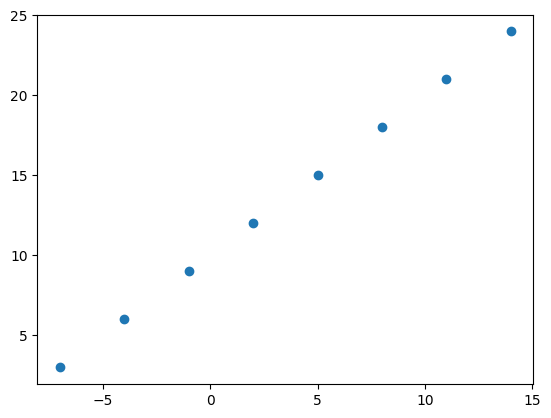

In [ ]:
plt.scatter(X,y)

# Steps in modelling with tensorflow
### 1 **creating a model** - defining the iput and output layers as well as the hidden layers of a deep leanring model
### 2 **compiling a model** - defines the loss function( in other words tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its leanring) and evaluation matircs(what we can useto interpret the performance of our model)
### 3 **fitting a model** - letting a model try to find patterns between X and y (features and labels)


In [ ]:
#  set random seed
tf.random.set_seed(42)

#  1 create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])
# or
#  model = tf.keras.Sequential
#  model.add(tf.keras.layers.Dense(1))
#  model.add(tf.keras.layers.Dense(1))

#  2 compile the model
model.compile(loss = tf.keras.losses.mae,               # mae is te mean absolute error
              optimizer = tf.keras.optimizers.SGD(),      # SGD is sochastic Gradient Descent
              metrics = ['mae'] )

# 3 fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 18.5638 - mae: 18.5638
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 17.6455 - mae: 17.6455
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 16.7875 - mae: 16.7875
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 15.9798 - mae: 15.9798
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 15.2131 - mae: 15.2131


In [ ]:
#  check out X and y
X,y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
y_predict = model.predict([17.0])
y_predict

1/1 [==============================] - 0s 463ms/step


array([[-5.7892265]], dtype=float32)

In [ ]:
y_predict + 12

array([[6.2107735]], dtype=float32)

## Improving our model

we can improve our model by altering the steps we took to create a model.
1.**Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function eachlayer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate**  of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training fir longer) or on more data (give the models more examples to improve from)

In [ ]:
#  Lets rebuild our model

# 1 create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2 compile the model

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3 Fit the model ("this time we will trian for a longer time")
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 670ms/step - loss: 9.0161 - mae: 9.0161
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8836 - mae: 8.8836
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 8.7511 - mae: 8.7511
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 8.6186 - mae: 8.6186
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 8.4861 - mae: 8.4861
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 8.3536 - mae: 8.3536
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2211 - mae: 8.2211
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 8.0886 - mae: 8.0886
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 7.9561 - mae: 7.9561
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.8236 - mae: 7.8236
Epoch 11/100
1/1 [==============================] - 0s 28ms/step - l

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 237ms/step


array([[30.2965]], dtype=float32)

In [ ]:
#  Lets rebuild our model

# 1 create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation ='relu'),
    tf.keras.layers.Dense(50, activation ='relu'),
    tf.keras.layers.Dense(50, activation ='relu'),



    tf.keras.layers.Dense(1)
    ])

# 2 compile the model

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
              metrics = ['mae'])

# 3 Fit the model ("this time we will trian for a longer time")
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.8599 - mae: 12.8599
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6877 - mae: 12.6877
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5292 - mae: 12.5292
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.3725 - mae: 12.3725
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2160 - mae: 12.2160
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0593 - mae: 12.0593
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9012 - mae: 11.9012
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 11.7402 - mae: 11.7402
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 11.5768 - mae: 11.5768
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 11.4112 - mae: 11.4112
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 283ms/step


array([[31.966347]], dtype=float32)

In [ ]:
#  model is overfitting


**Common ways to improve a deep model**:

1 Adding layers

2 Increase the number of hidden layers

3 Change the  activation function

4 Change the optimization function

5 Change the learning rate (lr) ( ehich is also trhe most uimp hyper parametr)

6 Fitting for longer


## Evaluatong a model
in practice a typical workflow you will go through while building a neural network is :



---


Build a model

Fit it

Evaluate it

Tweak a model

Fit it

evaluate it

Tweak a model

Fit it

evaluate it

\ When it comes to evaluation

 **visualize , visualize, visualize**

 THe data - what are we working with?    what does it look like

 The model - Whta does our model look likle?

 The training - How does a model perform when it learns

 The prediction - How do the models prediction line up agianst the plain truthm





In [ ]:
X = tf.range (-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

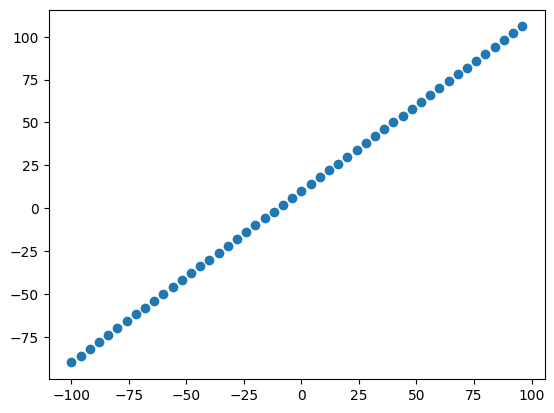

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y)

Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [ ]:
len(X)

50

In [ ]:
#  split the dsata intro train test and val

X_train = X[:40] # first 40
y_train = y[:40] # last 40

X_test = X[40:]
y_test = y[40:]


Visualizing

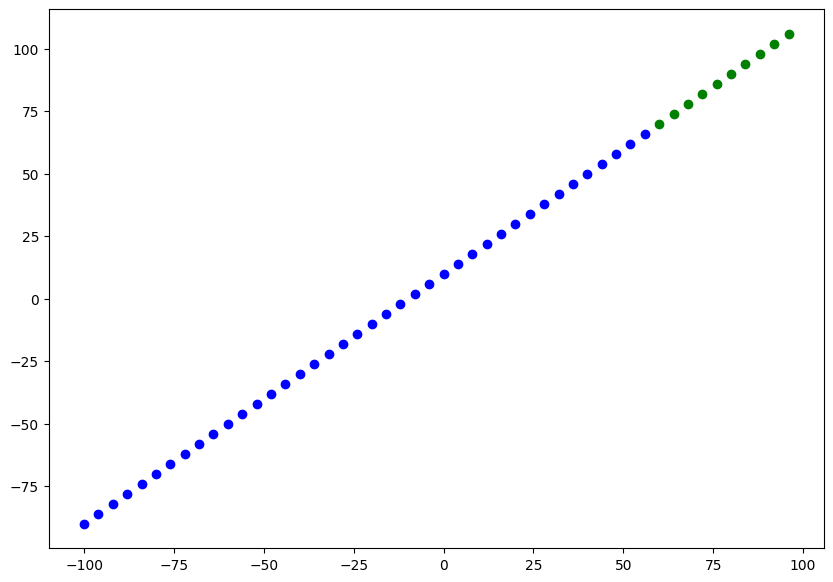

In [ ]:
plt.figure(figsize = (10,7))

#  plot train data
plt.scatter(X_train ,y_train , color ='blue', label = "Training data" )

#  plot test data
plt.scatter(X_test ,y_test , color ='green', label = "Testing data" )


plt.show()

In [ ]:
#  LEts have a look at how to buld a neural network for our data


In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# COmpile the model

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fitting the model
#model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs =100)


Visualizing our model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
model.build()

ValueError: ignored

In [ ]:

# Lets create a model that builds auti]omatically by definig the input shape argument

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1], name = "inut_layer"),
  tf.keras.layers.Dense(100,name = "mid_layer" , activation ="relu"),
  tf.keras.layers.Dense(1, name = 'output_layer')
], name = "model_1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:




model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inut_layer (Dense)          (None, 100)               200       
                                                                 
 mid_layer (Dense)           (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________



Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

**Total params** - total number of parameters in the model.

**Trainable parameters**- these are the parameters (patterns) the model can update as it trains.

**Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).
📖 Resource: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.




🛠 Exercise: Try playing around with the number of hidden units in the Dense layer (e.g. Dense(2), Dense(3)). How does this change the Total/Trainable params? Investigate what's causing the change.

For now, all you need to think about these parameters is that their learnable patterns in the data.

Let's fit our model to the training data.

In [ ]:
# Lets fit our model
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs =100, verbose = 0)

In [ ]:
#  call a summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inut_layer (Dense)          (None, 100)               200       
                                                                 
 mid_layer (Dense)           (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


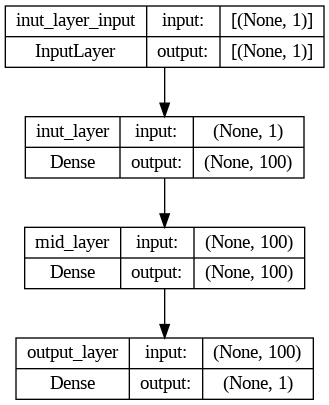

In [ ]:
# # one more way to visualize


from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


# Visualizing our models prediction

In [ ]:
# to visualize its agood ide to plot them against ground truth
# y_test/ y_true vs y_pred(ground truth)

In [ ]:
# make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 68ms/step


array([[ 76.92387 ],
       [ 81.9818  ],
       [ 87.03971 ],
       [ 92.09765 ],
       [ 97.15558 ],
       [102.21349 ],
       [107.27143 ],
       [112.329346],
       [117.387276],
       [122.44521 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# lets creaet a plotting fnction

def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  plt.figure(figsize = (10,7))

  #  plot train data
  plt.scatter(train_data,train_labels , color ='blue', label = "Training data" )

  #  plot test data
  plt.scatter(test_data ,test_labels , color ='green', label = "Testing data" )

  # plotiing predictions in red
  plt.scatter(test_data,predictions, c = "r", label="Predictions")

  plt.legend()
  plt.show()



<Figure size 1000x700 with 0 Axes>

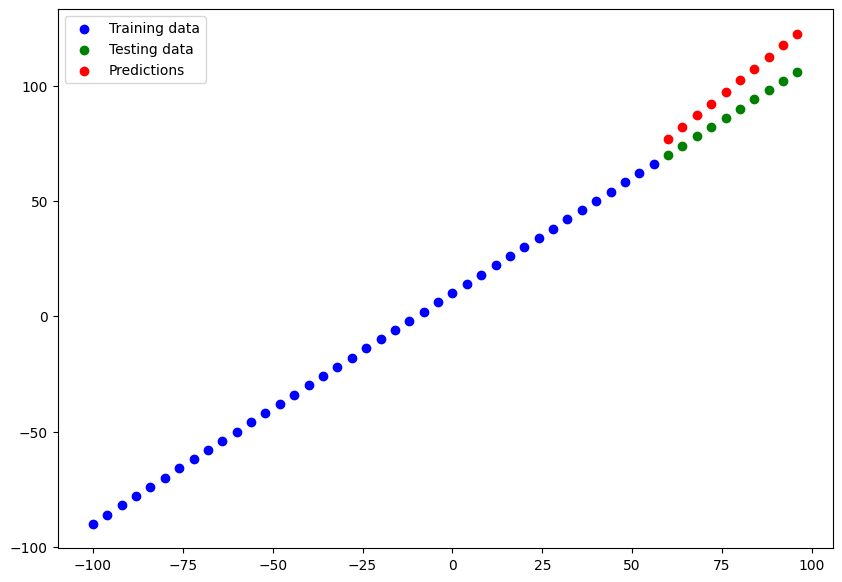

In [ ]:
plot_predictions()

In [ ]:
# we can say models not performing well



Evaluation matrix

In [ ]:
# depending on the problem there are diff evaluating matrix
# for regression two main ones are
#  1 Mae (on avg how wrong)
#  2 MSE  ( square the avg errors)

In [ ]:
# EValuate the model on the test
model.evaluate (X_test,y_test)

1/1 [==============================] - 0s 238ms/step - loss: 11.6845 - mae: 11.6845


[11.68453598022461, 11.68453598022461]

In [ ]:
#  calculate mean abs error
mae = tf.keras.losses.MAE(y_test,y_pred)

In [ ]:
y_pred, y_test

(array([[ 76.92387 ],
        [ 81.9818  ],
        [ 87.03971 ],
        [ 92.09765 ],
        [ 97.15558 ],
        [102.21349 ],
        [107.27143 ],
        [112.329346],
        [117.387276],
        [122.44521 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.constant(y_pred) , y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 76.92387 ],
        [ 81.9818  ],
        [ 87.03971 ],
        [ 92.09765 ],
        [ 97.15558 ],
        [102.21349 ],
        [107.27143 ],
        [112.329346],
        [117.387276],
        [122.44521 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
#  diff shape

In [ ]:
w = tf.squeeze(y_pred)

In [ ]:
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred) )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.684536>

In [ ]:
MSE = tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))
MSE

<tf.Tensor: shape=(), dtype=float32, numpy=145.76186>

In [ ]:
# function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))


In [ ]:
#  runnning experiments to imrove our model
#  get more data = more examples, more opportunities to learn patterns
#  make yor model larger - more layers and more hidden units in each layer
#  train for longer = give your model more of a chance to find patterns in data


In [ ]:
# model1 = same as original, 1 layer, 100 epochs
# model 2 = 2 layers, 100 epochs
# model 3 = 2 layers, 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 79.2323 - mae: 79.2323
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 43.8598 - mae: 43.8598
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3352 - mae: 9.3352
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.2049 - mae: 10.2049
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4666 - mae: 9.4666
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.6039 - mae: 8.6039
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.0690 - mae: 9.0690
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7924 - mae: 18.7924
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1533 - mae: 10.1533
Epoch 11/100
2/2 [==============================] - 0s 8ms/ste

1/1 [==============================] - 0s 57ms/step


<Figure size 1000x700 with 0 Axes>

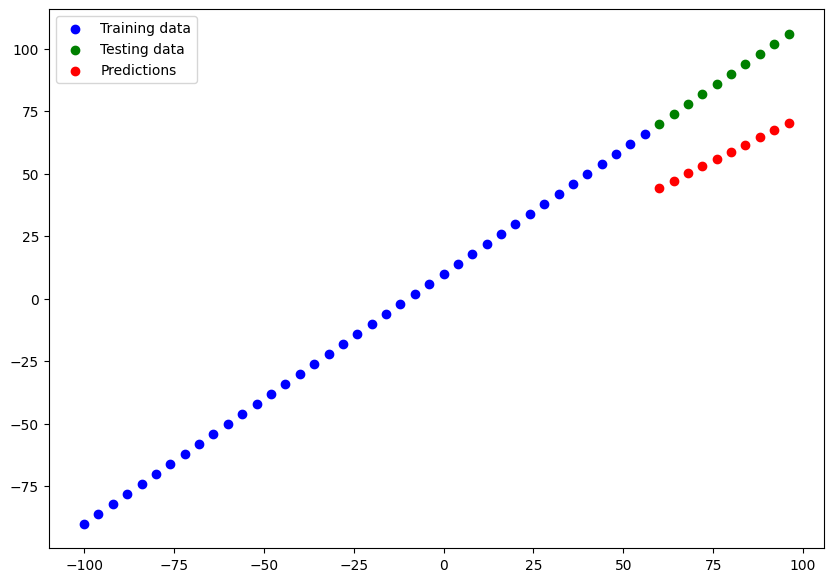

In [ ]:
#  make and plot predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
#  calculate model_1 evaluation
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.62092>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.042>)

In [ ]:
# model 2

tf.random.set_seed(42)
#  create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(250),

    tf.keras.layers.Dense(1)
])
# compile
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)
# fit
model2.fit(tf.expand_dims(X_train , axis = -1),y_train , epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 40.5535 - mse: 2277.8169
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 31.0969 - mse: 1277.4717
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 35.6927 - mse: 1932.8689
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 29.4041 - mse: 1279.9041
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.9082 - mse: 332.8874
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6015 - mse: 207.9579
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8548 - mse: 174.6139
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.9019 - mse: 227.4547
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 33.9227 - mse: 1723.1091
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 23.2270 - mse: 754.4830
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 57ms/step


<Figure size 1000x700 with 0 Axes>

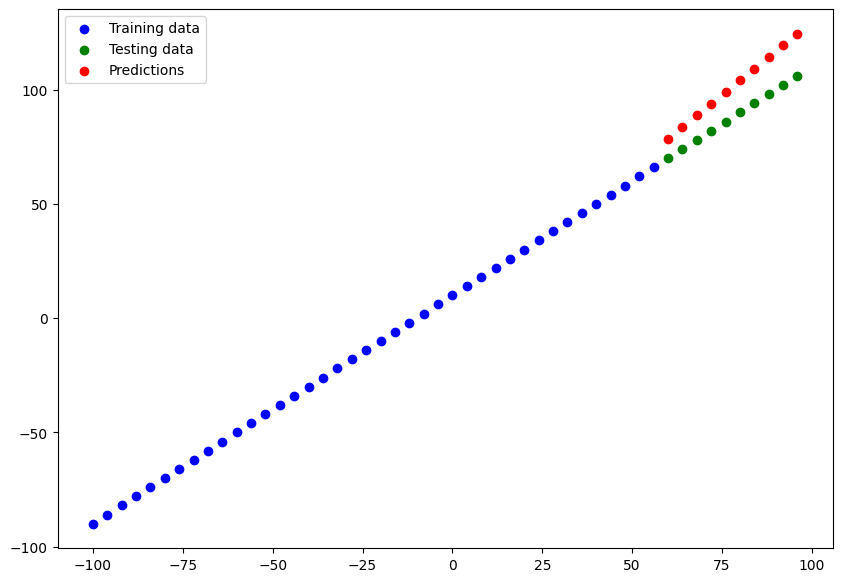

In [ ]:
# make abnd plot predictions
y_preds_2 = model2.predict(X_test)
plot_predictions(predictions =y_preds_2)


In [ ]:
#  calculate evaluation metrics

In [ ]:
mae_2  = mae(y_test , y_preds_2)
mse_2  = mse(y_test, y_preds_2)

In [ ]:
mse_2,mae_2

(<tf.Tensor: shape=(), dtype=float32, numpy=190.15044>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.417398>)

In [ ]:
# model 3

tf.random.set_seed(42)

# create
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(250),
    tf.keras.layers.Dense(1)
])

#  compile

model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics =['mae']
)

model3.fit(tf.expand_dims(X_train, axis =-1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 41.5198 - mae: 41.5198
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 31.6144 - mae: 31.6144
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 36.3279 - mae: 36.3279
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 28.8039 - mae: 28.8039
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 15.6242 - mae: 15.6242
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 12.3950 - mae: 12.3950
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.6758 - mae: 11.6758
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0787 - mae: 12.0787
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 37.8074 - mae: 37.8074
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.4263 - mae: 25.4263
Epoch 11/500
2/2 [==============================] - 0s 9

1/1 [==============================] - 0s 112ms/step


<Figure size 1000x700 with 0 Axes>

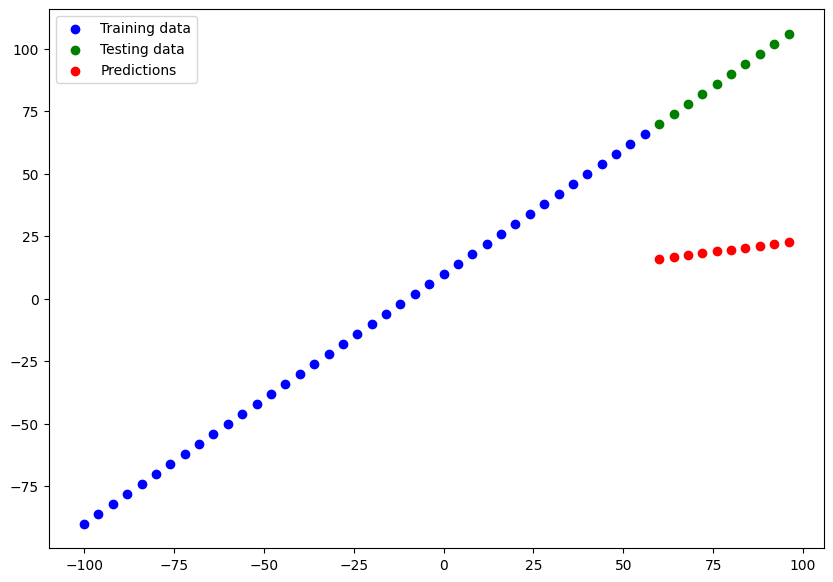

In [ ]:
# predictions

y_preds_3 = model3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [ ]:
# evaluation
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)

In [ ]:
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68768>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.4404>)

In [ ]:
#  model is overfitting

In [ ]:
# From our experiments, it looks like model_2 performed the best.

# And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here.

# But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

# Each model you build is a small experiment.

# 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

# Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

In [ ]:
#  start smal; build up complexity as ad when needed

In [ ]:
#  comparing the results of our expreminets using pandas df
import pandas as pd
model_results = [['model1',mae_1.numpy(),mse_1.numpy()],
                 ['model2',mae_2.numpy(),mse_2.numpy()],
                 ['model3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results , columns = ['model','mae','mse'])
all_results

,model,mae,mse
0,model1,30.620920,948.041992
1,model2,13.417398,190.150436
2,model3,68.687683,4804.440430


In [ ]:

# model2 performed the best

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               500       
                                                                 
 dense_10 (Dense)            (None, 1)                 251       
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# one of your main goals is to reduce the time between your exps
#  the more exps you do the more thinsg you will figure out which dont work.


In [ ]:
# Tracking your experminets
# one really good habit in ML modelling is to trak yor exps
#  to ismplify we have tools
# **Resource**
# TensorBoard - a component of tf library to help track modelling exps
# Weights and Biases -  tool for tracking all kijnds of ML experiments (plugs straight inro TensoBoard)


Saving our models

In [ ]:
#  there are two main formats to save a model
# TH SaveModel format
# THe HDF5 format


In [ ]:
# SaveModel
model2.save("model2") # saves a folder

In [ ]:
# HDF5  (universal format)
model2.save("model2.h5") # saves a file

Loading and Re-evaluating a model

In [ ]:
loaded_savedModel = tf.keras.models.load_model("/content/model2")
loaded_savedModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               500       
                                                                 
 dense_10 (Dense)            (None, 1)                 251       
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model2_preds = model2.predict(X_test)
loaded_savedModel_preds = loaded_savedModel.predict(X_test)
loaded_savedModel == model2_preds

1/1 [==============================] - 0s 56ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [ ]:
model2_preds , loaded_savedModel_preds


(array([[ 78.43248 ],
        [ 83.540245],
        [ 88.647995],
        [ 93.75575 ],
        [ 98.86352 ],
        [103.971275],
        [109.07904 ],
        [114.1868  ],
        [119.29456 ],
        [124.40232 ]], dtype=float32),
 array([[ 78.43248 ],
        [ 83.540245],
        [ 88.647995],
        [ 93.75575 ],
        [ 98.86352 ],
        [103.971275],
        [109.07904 ],
        [114.1868  ],
        [119.29456 ],
        [124.40232 ]], dtype=float32))

In [ ]:
mae( y_true = y_test , y_pred = model2_preds) == mae( y_true = y_test , y_pred = loaded_savedModel_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
loaded_savedModel_preds.squeeze()

array([ 78.43248 ,  83.540245,  88.647995,  93.75575 ,  98.86352 ,
       103.971275, 109.07904 , 114.1868  , 119.29456 , 124.40232 ],
      dtype=float32)

In [ ]:
model2_preds.squeeze()

array([ 78.43248 ,  83.540245,  88.647995,  93.75575 ,  98.86352 ,
       103.971275, 109.07904 , 114.1868  , 119.29456 , 124.40232 ],
      dtype=float32)

In [ ]:
loaded_savedModel_preds.squeeze() == model2_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
#  cuz we made an error
loaded_savedModel_preds == model2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
load_h5_model = tf.keras.models.load_model("/content/model2.h5")
load_h5_model

In [ ]:
load_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               500       
                                                                 
 dense_10 (Dense)            (None, 1)                 251       
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 250)               500       
                                                                 
 dense_10 (Dense)            (None, 1)                 251       
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  check to see if predictions match
load_h5_model_preds = load_h5_model.predict(X_test)
load_h5_model_preds == model2_preds

1/1 [==============================] - 0s 224ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a file or any other fike from colab
 1  go to files tab and right click on the file you are after and click download

2  Use code below

3  Save it to gogle drive by connecting and copying it there (see 2nd code)

In [ ]:
from google.colab import files
files.download("/content/model2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp /content/model2.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

## A LARGE MODEL

In [ ]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
# read thye dataset
insurance = pd.read_csv(r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#  charges is the dpendent variable
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
df = pd.get_dummies(insurance)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = df.drop(['charges'],axis = 'columns')
X
y = df.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, ranodm_state = 42)



In [ ]:
#  creat your model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# compile
insurance_model.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics =['mae'])

# fit
insurance_model.fit(tf.expand_dims(X_train, axis =-1),y_train,epochs = 100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12949.9668 - mae: 12949.9668
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12077.4209 - mae: 12077.4209
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11999.8389 - mae: 11999.8389
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11924.9463 - mae: 11924.9463
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11807.2871 - mae: 11807.2871
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11613.6934 - mae: 11613.6934
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11281.1689 - mae: 11281.1689
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10761.1191 - mae: 10761.1191
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10140.1074 - mae: 10140.1074
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9569.164

In [ ]:

# Check the results of the insurance model

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8471.2773 - mae: 8471.2773


[8471.27734375, 8471.27734375]

In [ ]:
y_train.median(), y_train.mean()

(9331.610175000002, 13152.468258420562)

In [ ]:
#  right now our model isnt performing really well

In [ ]:
# Lets improve

In [ ]:
#  creat your model
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),

    tf.keras.layers.Dense(1)
])
# compile
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =['mae'])

# fit
history = insurance_model_2.fit(tf.expand_dims(X_train, axis =-1),y_train,epochs = 100, verbose =0)


In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 8454.1904 - mae: 8454.1904


[8454.1904296875, 8454.1904296875]

Text(0, 0.5, 'epochs')

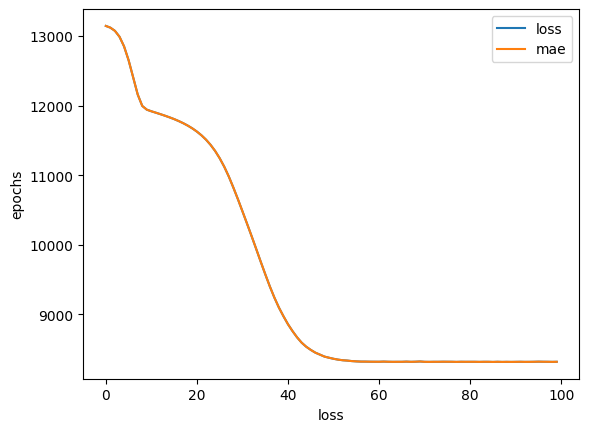

In [ ]:
#  plot history(training/loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

In [ ]:
# hown long should you train

In [ ]:
#  EarlyStopping callback
#  stops training once it stops improving

In [ ]:
history_2 = insurance_model_2.fit(tf.expand_dims(X_train, axis =-1),y_train,epochs = 100, verbose =0)


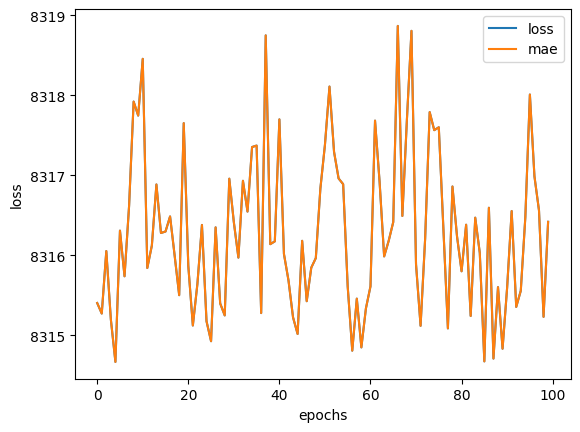

In [ ]:

# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae



9/9 [==============================] - 0s 4ms/step - loss: 8452.6797 - mae: 8452.6797


(8452.6796875, 8452.6796875)

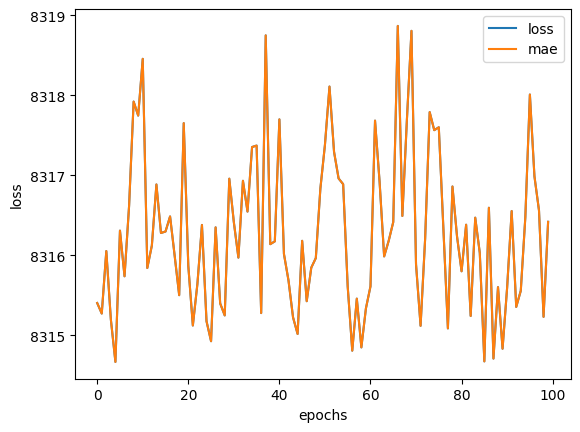

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variab

## Preprocessing data (normalization and standardization)

In [ ]:
# A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

# This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

# There is another process call standardization which converts all of your data to unit variance and 0 mean.

# These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

# Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

# Turning all of your data to numbers (a neural network can't handle strings).
# Making sure your data is in the right shape (verifying input and output shapes).
# Feature scaling:
# Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
# Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
# Which one should you use?
# With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.
# 📖 Resource: For more on preprocessing data, I'd recommend reading the following resources:

# Scikit-Learn's documentation on preprocessing data.
# Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale.
# We've already turned our data into numbers using get_dummies(), let's see how we'd normalize it as well.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


# Check out the data
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

# To do this, we're going to use a few classes from Scikit-Learn:

# make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
# MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
# OneHotEncoder - one hot encode the non-numerical columns.
# Let's see them in action.

In [ ]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#  Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history_3= insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
# evaluate
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.1389 - mae: 3175.1389


In [ ]:
# And finally, let's compare the results from insurance_model_2 (trained on non-normalized data) and insurance_model_3 (trained on normalized data).

In [ ]:

# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae





(8452.6796875, 3175.138916015625)

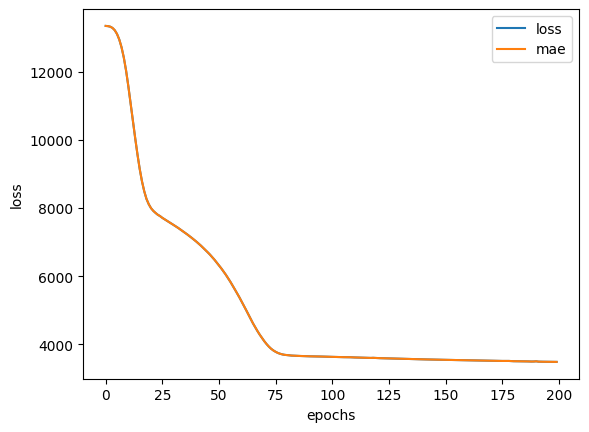

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variab

In [ ]:
# From this we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

# This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).

# insurance_model_2 may have eventually achieved the same results as insurance_model_3 if we left it training for longer.

# Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

# But since our main goal as neural network practitioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.